<a href="https://colab.research.google.com/github/chape8/Signal-Processing-III/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


ruta = '/content/drive/MyDrive/Colab_Notebooks/Miniproyecto1/'
#ruta = '/content/drive/MyDrive/Señales3/ArchivosMiniProy1/'
fileName = 'DataMP1.csv'
dataFrame = pd.read_csv(ruta+fileName)

labels = dataFrame.iloc[:,-1]
X = dataFrame.iloc[:,:42]

dataFrame

,GSR_ASR,GSR_ART,GSR_SP1,GSR_SP2,GSR_SP3,GSR_SP4,GSR_SP5,GST_SP6,GST_SP7,GST_SP8,...,EEG_SPA2,EEG_SPA3,EEG_SPA4,EEG_SPA5,EEG_SPB1,EEG_SPB2,EEG_SPB3,EEG_SPB4,EEG_SPB5,emociones
0,10185.8373,2.8610,5824.086256,3160.889602,1531.962502,1407.169064,1112.161887,946.870950,928.750378,756.121295,...,1.865161,5.184980,3.461216,5.041652,2.347163,1.275503,1.003328,0.899888,3.630238,-1
1,21389.0536,5.4277,5901.050602,5630.767559,3266.364561,2322.511795,2195.642188,1637.077819,1488.656242,1483.136799,...,4.361935,7.807040,7.042410,11.376475,2.705221,1.546289,1.463202,1.123135,4.089784,1
2,3638.4043,3.2995,6631.572569,4495.135267,4154.063415,3820.369967,2106.092449,1860.914648,1788.312912,1565.316907,...,3.694577,6.448128,3.988058,13.472448,3.966875,7.282834,1.469042,1.323243,28.286193,1
3,5976.4411,1.7400,3651.065367,2169.304973,1506.748412,977.858909,731.283848,525.795948,505.031318,481.742671,...,5.335904,4.490130,3.020488,15.374982,4.037560,3.302149,1.213788,0.994780,11.462958,1
4,-3103.7651,2.8309,7820.942207,2373.298569,1500.350662,1314.859602,1184.245000,1132.603089,1061.837264,785.553400,...,6.142650,5.798278,5.087005,25.914103,5.881958,11.364667,2.188542,2.427907,49.342339,0
5,-1554.2202,2.0712,5098.209113,3616.809486,3574.573996,3571.895109,2086.905875,1507.515297,1417.932482,1234.394187,...,4.123910,3.896095,3.614934,12.999729,3.476684,2.377859,1.493458,1.226882,7.242188,0
6,12228.7500,3.4401,5850.529766,3440.963239,2803.855218,1926.028872,1248.302459,1047.737737,982.579685,970.384118,...,3.389828,5.144338,4.325678,9.845600,4.995091,2.106852,1.383918,1.079252,5.782894,1
7,1262.8277,2.4089,4480.883860,2206.169540,1752.638742,1327.046007,1079.291554,867.161223,558.254187,492.347030,...,2.895643,4.206870,2.693486,11.025678,3.928179,1.561336,1.005914,0.768845,4.644839,-1
8,3409.2335,2.3834,3492.834431,2144.129060,1096.500488,936.078126,709.164006,579.806225,518.769025,445.785444,...,2.357371,5.321294,3.388625,5.438403,1.701443,0.935837,1.488231,0.889604,1.781128,0
9,-6240.9078,3.3529,8832.824545,4777.153307,4094.881401,2088.918366,2011.623456,1634.592848,1634.156187,1338.195001,...,4.012138,5.584374,4.661680,13.543346,3.529477,2.317885,1.253263,0.937862,8.117149,0


In [28]:
scaler = StandardScaler()
scaler.fit(X)
print('Var',scaler.var_)
print('mean',scaler.mean_)
Xscaled = scaler.transform(X)

StandardScaler()


In [4]:
acc_train = []
acc_test = []
Nreps = 100
for it in range(Nreps):

  Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled,labels,test_size=0.05)

  from sklearn.linear_model import LogisticRegression

  modelRL = LogisticRegression(C = 0.05)
  modelRL.fit(Xtrain,ytrain)

  from sklearn.metrics import accuracy_score

  y_est_train = modelRL.predict(Xtrain)
  y_est_test = modelRL.predict(Xtest)
  acc_train.append(accuracy_score(ytrain,y_est_train))
  acc_test.append(accuracy_score(ytest,y_est_test))


print('Acc Train: ',np.mean(acc_train),'+/-',np.std(acc_train))
print('Acc Test: ',np.mean(acc_test),'+/-',np.std(acc_test))

Acc Train:  0.8818421052631578 +/- 0.029184435953758952
Acc Test:  0.465 +/- 0.3335790760824186


In [5]:
'''pca = PCA(n_components=2)
pca.fit(X) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
print(X.shape)'''

'pca = PCA(n_components=2)\npca.fit(X) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)\nprint(X.shape)'

In [6]:
#print(pca.explained_variance_)

In [13]:
'''X_pca = pca.transform(X) # Transformamos los datos al espacio latente
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)'''

print('Input Space:',X.shape)

Input Space: (40, 42)


Input Space: (40, 42)
Latent Space: (40, 4)
[4.94717274e+12 9.67465298e+10 4.78240142e+09 8.54510336e+07]
(4, 42)


Text(0.5, 1.0, 'Var explained normalized')

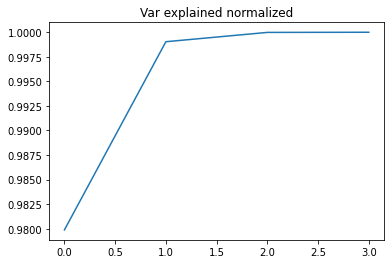

In [31]:

pca = PCA(n_components = 4)  # project from 64 to 2 dimensions

projectedZ = pca.fit_transform(X)
BasisW = pca.components_
print('Input Space:',X.shape)
print('Latent Space:',projectedZ.shape)
print(pca.explained_variance_)
print(BasisW.shape)
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Var explained normalized')

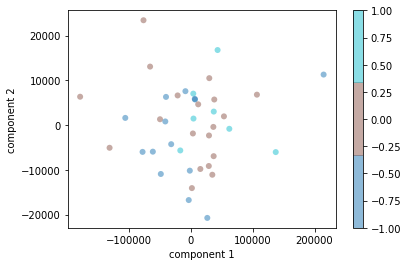

In [32]:
plt.scatter(projectedZ[:, 2], projectedZ[:, 3],
             c=labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();